In [ ]:
!pip install ydata_profiling
import numpy as np
#-----------------------------------
import pandas as pd
from ydata_profiling import ProfileReport

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('mode.chained_assignment',None)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
#------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import shapiro, probplot
#------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [9]:
!unzip '/content/Beijing-Air.zip'

Archive:  /content/Beijing-Air.zip
  inflating: sample_submission.csv.xlsx  
  inflating: beijing_test.csv        
  inflating: beijing_train.csv       


In [10]:
data_air_train = pd.read_csv('/content/beijing_train.csv')
data_air_test = pd.read_csv('/content/beijing_test.csv')

In [11]:
data_air_train.shape

(403776, 18)

In [12]:
data_air_train.isna().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

**Filling missing values with median**

In [13]:
data_air_train['PM2.5'].fillna(data_air_train['PM2.5'].median(), inplace=True)
data_air_train['PM10'].fillna(data_air_train['PM10'].median(), inplace=True)
data_air_train['SO2'].fillna(data_air_train['SO2'].median(), inplace=True)
data_air_train['NO2'].fillna(data_air_train['NO2'].median(), inplace=True)
data_air_train['CO'].fillna(data_air_train['CO'].median(), inplace=True)
data_air_train['O3'].fillna(data_air_train['O3'].median(), inplace=True)
data_air_train['TEMP'].fillna(data_air_train['TEMP'].median(), inplace=True)
data_air_train['PRES'].fillna(data_air_train['PRES'].median(), inplace=True)
data_air_train['DEWP'].fillna(data_air_train['DEWP'].median(), inplace=True)
data_air_train['RAIN'].fillna(data_air_train['RAIN'].median(), inplace=True)
data_air_train['WSPM'].fillna(data_air_train['WSPM'].median(), inplace=True)

**Dropping row no column**

In [14]:
data_air_train.dropna(subset = ['wd'], inplace=True)

In [15]:
data_air_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.00,4.00,4.00,7.00,300.00,77.00,-0.70,1023.00,-18.80,0.00,NNW,4.40,Aotizhongxin
1,2,2013,3,1,1,8.00,8.00,4.00,7.00,300.00,77.00,-1.10,1023.20,-18.20,0.00,N,4.70,Aotizhongxin
2,3,2013,3,1,2,7.00,7.00,5.00,10.00,300.00,73.00,-1.10,1023.50,-18.20,0.00,NNW,5.60,Aotizhongxin
3,4,2013,3,1,3,6.00,6.00,11.00,11.00,300.00,72.00,-1.40,1024.50,-19.40,0.00,NW,3.10,Aotizhongxin
4,5,2013,3,1,4,3.00,3.00,12.00,12.00,300.00,72.00,-2.00,1025.20,-19.50,0.00,N,2.00,Aotizhongxin



Converting Year, Month, Day, Hour column into datetime format

In [16]:
data_air_train['dateInt'] = data_air_train['year'].astype(str) + data_air_train['month'].astype(str).str.zfill(2)+ data_air_train['day'].astype(str).str.zfill(2)+data_air_train['hour'].astype(str).str.zfill(2)
data_air_train['Date'] = pd.to_datetime(data_air_train['dateInt'], format='%Y%m%d%H')

In [17]:
data_air_train['dateInt']=data_air_train['year'].astype(str) + data_air_train['month'].astype(str).str.zfill(2)+ data_air_train['day'].astype(str).str.zfill(2)
data_air_train['date'] = pd.to_datetime(data_air_train['dateInt'], format='%Y%m%d')

In [18]:
data_air_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,dateInt,Date,date
0,1,2013,3,1,0,4.00,4.00,4.00,7.00,300.00,77.00,-0.70,1023.00,-18.80,0.00,NNW,4.40,Aotizhongxin,20130301,2013-03-01 00:00:00,2013-03-01
1,2,2013,3,1,1,8.00,8.00,4.00,7.00,300.00,77.00,-1.10,1023.20,-18.20,0.00,N,4.70,Aotizhongxin,20130301,2013-03-01 01:00:00,2013-03-01
2,3,2013,3,1,2,7.00,7.00,5.00,10.00,300.00,73.00,-1.10,1023.50,-18.20,0.00,NNW,5.60,Aotizhongxin,20130301,2013-03-01 02:00:00,2013-03-01
3,4,2013,3,1,3,6.00,6.00,11.00,11.00,300.00,72.00,-1.40,1024.50,-19.40,0.00,NW,3.10,Aotizhongxin,20130301,2013-03-01 03:00:00,2013-03-01
4,5,2013,3,1,4,3.00,3.00,12.00,12.00,300.00,72.00,-2.00,1025.20,-19.50,0.00,N,2.00,Aotizhongxin,20130301,2013-03-01 04:00:00,2013-03-01


#Renaming the columns

**Renaming the columns**



In [19]:
data_air_train.rename(columns= {'year':'Year',
                    'month':'Month',
                    'day':'Day',
                    'hour':'Hour',
                    'TEMP':'Temp',
                    'PRES':'Press',
                    'DEWP':'DewP',
                    'RAIN':'Rain',
                    'wd':'WinDir',
                    'WSPM':'WinSpeed',
                    'station':'Station'}, inplace=True)

In [20]:
data_air_train.dtypes

REF_NO               int64
Year                 int64
Month                int64
Day                  int64
Hour                 int64
PM2.5              float64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
Temp               float64
Press              float64
DewP               float64
Rain               float64
WinDir              object
WinSpeed           float64
Station             object
dateInt             object
Date        datetime64[ns]
date        datetime64[ns]
dtype: object

Exploratory Data Analysis and Data Visualization


Get only relevent Data

In [21]:
data_air_train.drop(['Year','Month','Day','Hour','dateInt'], axis=1).describe()

,REF_NO,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinSpeed,Date,date
count,402387.00,402387.00,402387.00,402387.00,402387.00,402387.00,402387.00,402387.00,402387.00,402387.00,402387.00,402387.00,402387,402387
mean,16793.55,78.68,103.95,15.56,50.11,1197.95,57.81,14.10,1010.28,3.15,0.07,1.72,2015-01-29 16:32:44.783156736,2015-01-29 05:02:38.972332544
min,1.00,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-36.00,0.00,0.00,2013-03-01 00:00:00,2013-03-01 00:00:00
25%,8386.00,21.00,37.00,2.86,24.00,500.00,12.00,4.00,1001.90,-8.00,0.00,0.90,2014-02-13 09:00:00,2014-02-13 00:00:00
50%,16772.00,55.00,83.00,7.00,43.00,900.00,45.00,15.40,1009.80,4.10,0.00,1.40,2015-01-28 19:00:00,2015-01-28 00:00:00
75%,25203.00,109.00,144.00,19.00,69.00,1500.00,82.00,23.60,1018.30,15.50,0.00,2.20,2016-01-15 02:00:00,2016-01-15 00:00:00
max,33648.00,999.00,999.00,500.00,290.00,10000.00,1071.00,41.60,1042.80,29.10,72.50,13.20,2016-12-31 23:00:00,2016-12-31 00:00:00
std,9708.04,78.36,89.45,21.56,34.27,1096.95,56.53,11.31,10.36,13.63,0.84,1.24,NaN,NaN


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

Wind direction frequency

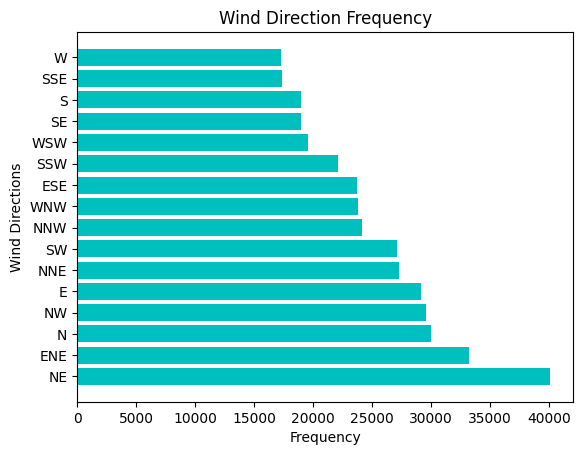

In [23]:
plt.figure()
plt.barh(data_air_train['WinDir'].value_counts().index, data_air_train['WinDir'].value_counts(), color='c')
plt.xlabel('Frequency')
plt.ylabel('Wind Directions')
plt.title('Wind Direction Frequency')
plt.show()

Relationship between Temperature and PM2.5

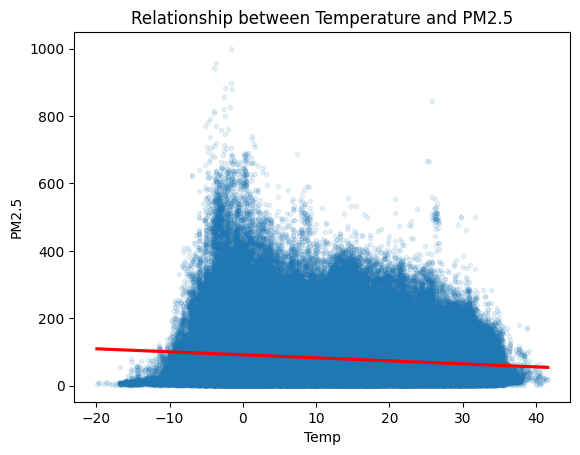

In [24]:
sns.regplot(x='Temp', y='PM2.5', data=data_air_train, marker='.', scatter_kws={'alpha':0.1}, line_kws={'color':'r'})
plt.title('Relationship between Temperature and PM2.5')
plt.show()

Relationship between Dew Point and PM2.5

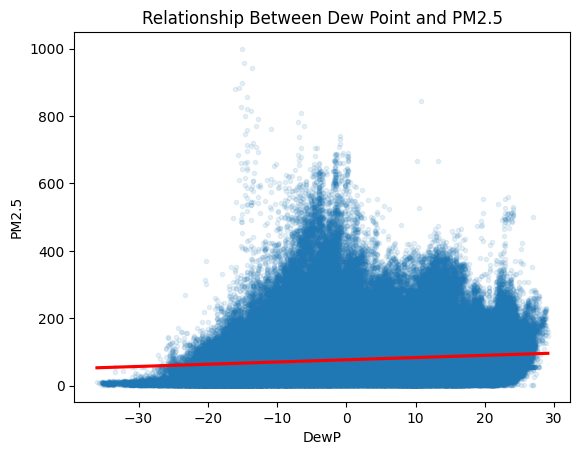

In [25]:
sns.regplot(x='DewP', y='PM2.5', data=data_air_train, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Relationship Between Dew Point and PM2.5')
plt.show()

Relationship Between SO2 and PM2.5

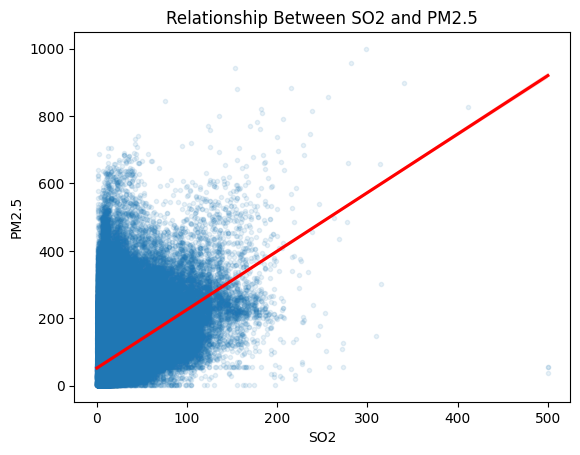

In [26]:
sns.regplot(x='SO2', y='PM2.5', data=data_air_train, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Relationship Between SO2 and PM2.5')
plt.show()

Relationship Between NO2 and PM10

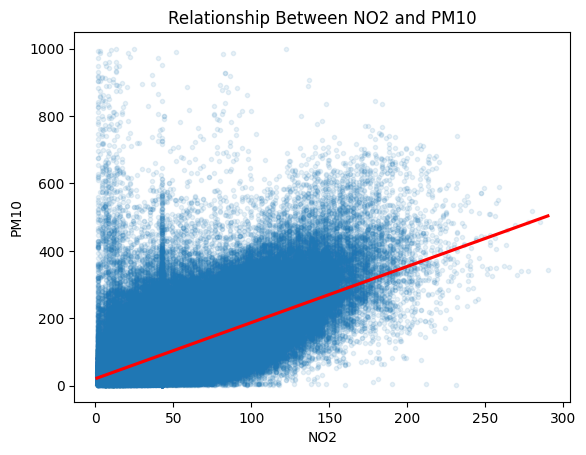

In [27]:
sns.regplot(x='NO2', y='PM10', data=data_air_train, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Relationship Between NO2 and PM10')
plt.show()

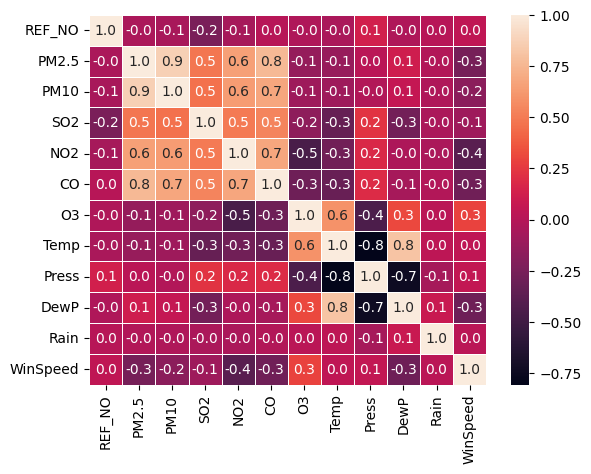

In [28]:
sns.heatmap(data_air_train.drop(["Year", "Month", "Day", "Hour", "Date", "dateInt", "date","WinDir","Station"], axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

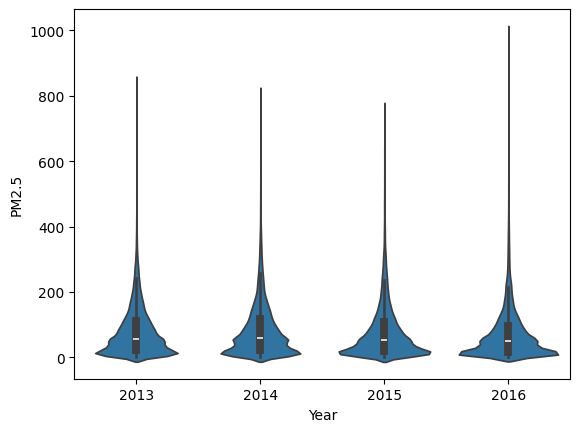

In [29]:
sns.violinplot(x="Year", y="PM2.5", data=data_air_train)
plt.show()

Yearly Analysis

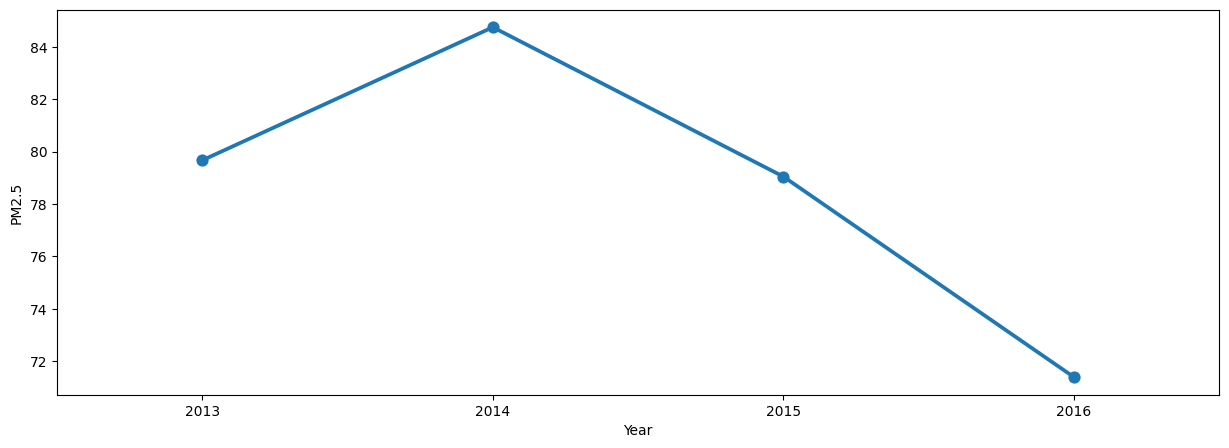

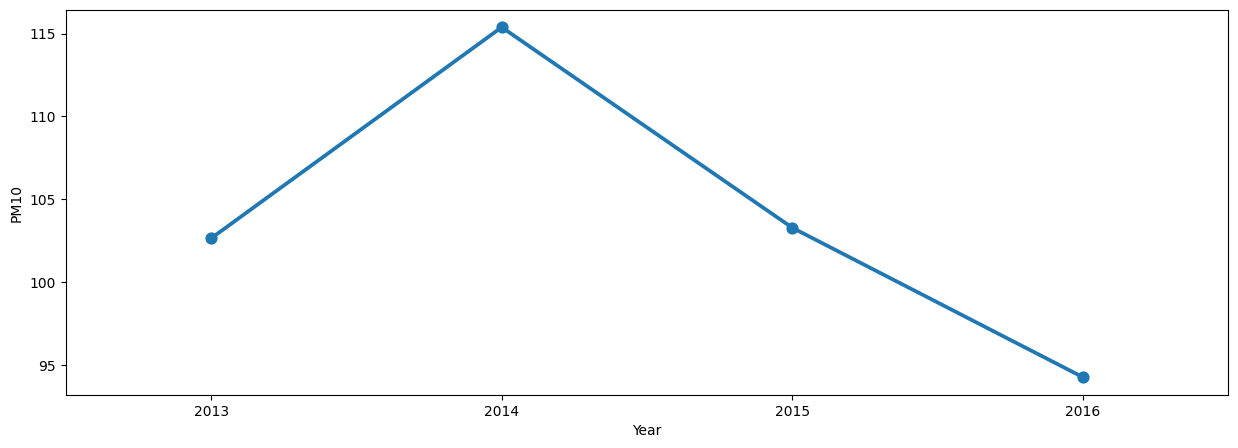

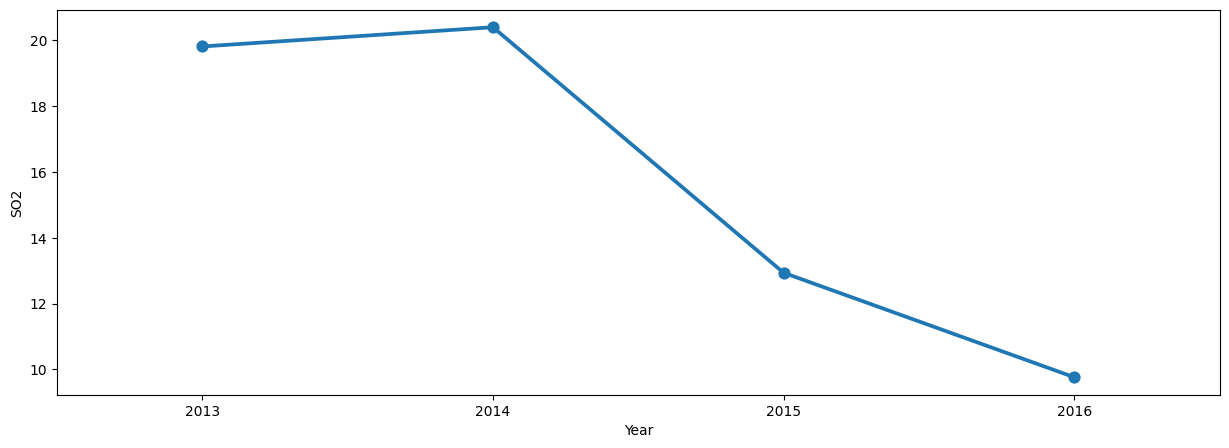

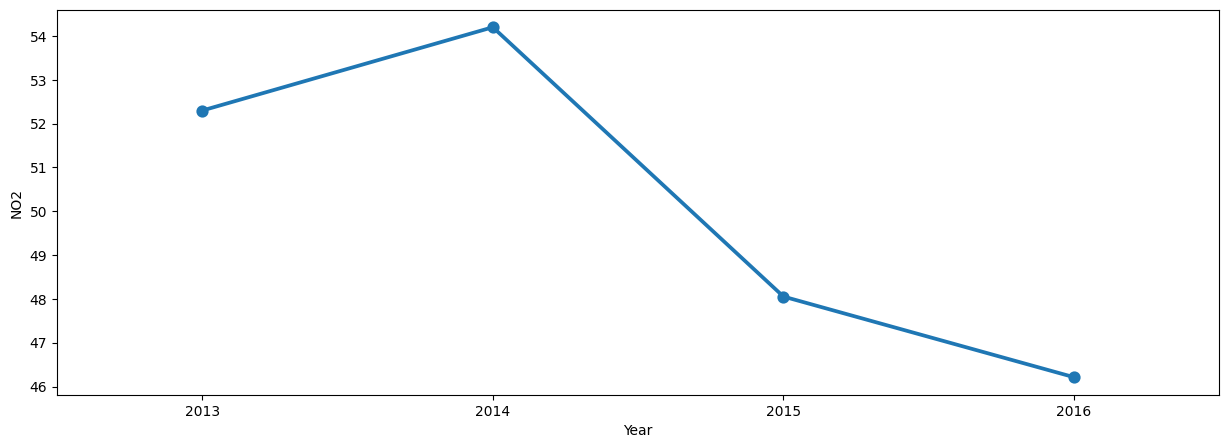

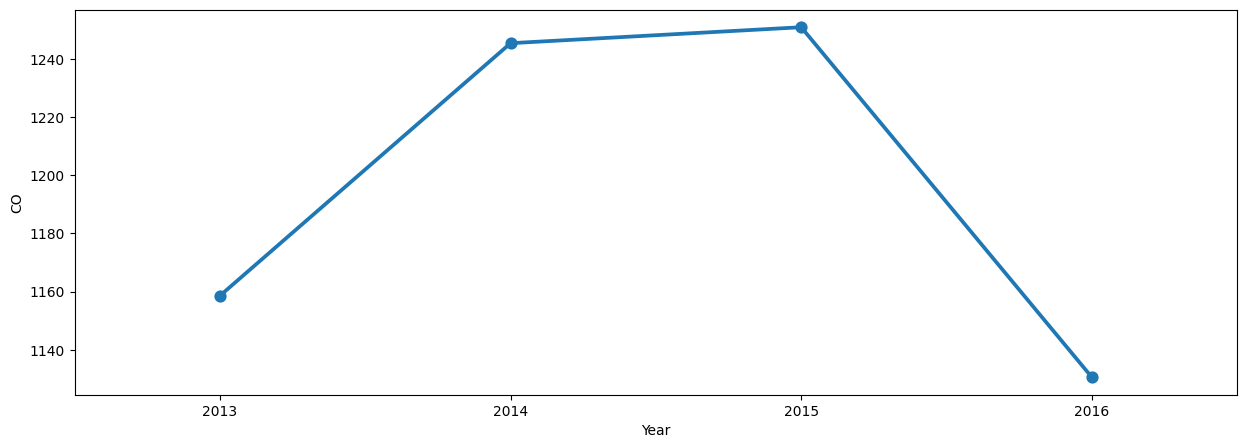

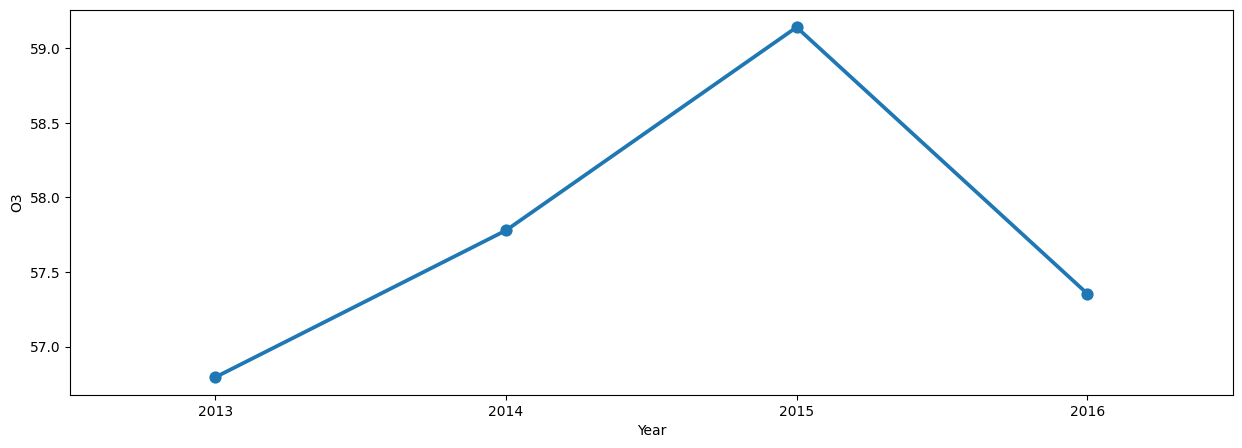

In [30]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in compounds:
    data_air_train1 = data_air_train[[i, 'Year']].groupby(["Year"]).mean().reset_index().sort_values(by='Year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=data_air_train1)

Monthly Analysis


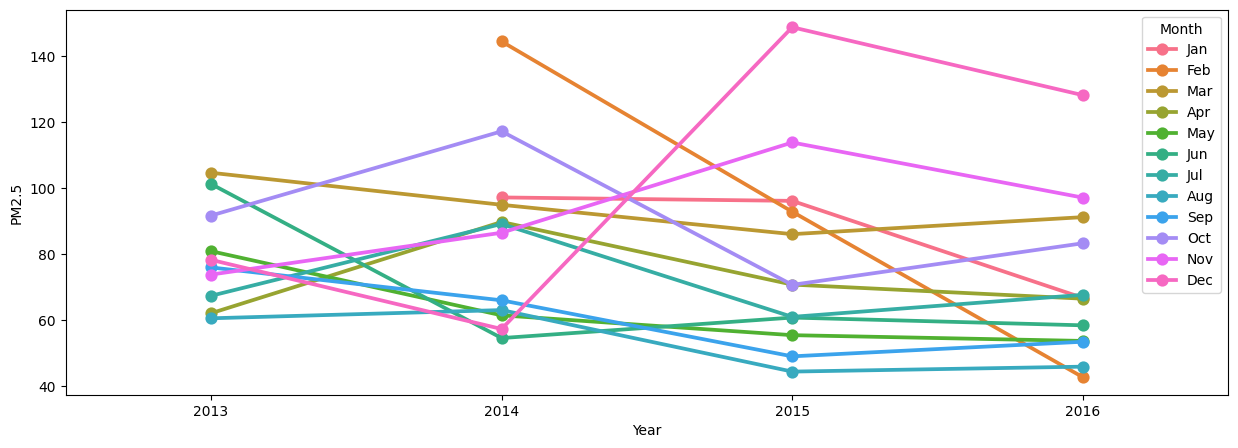

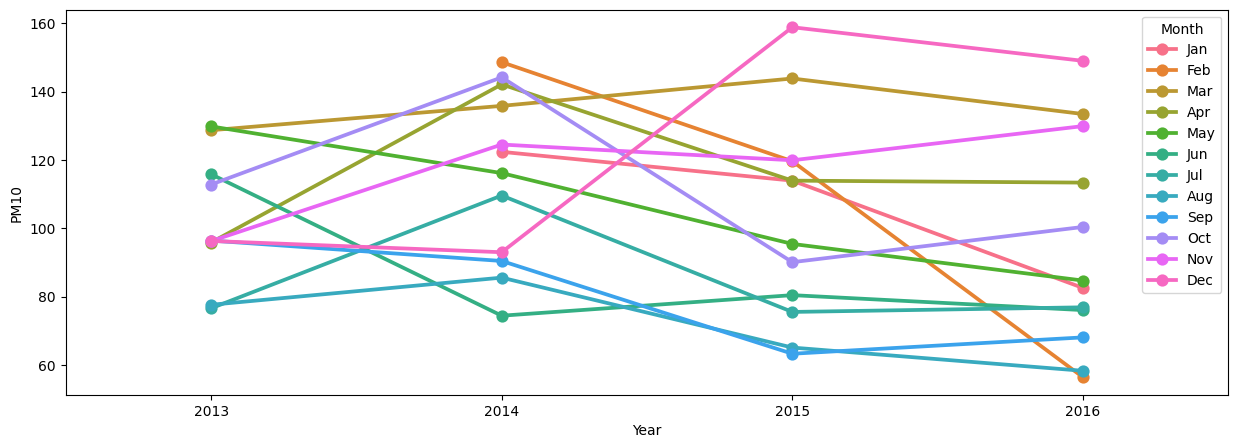

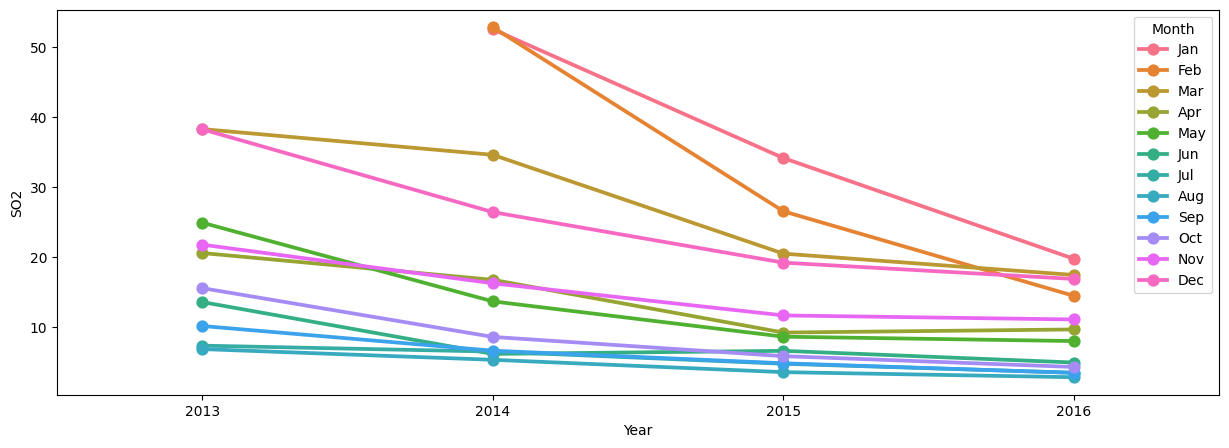

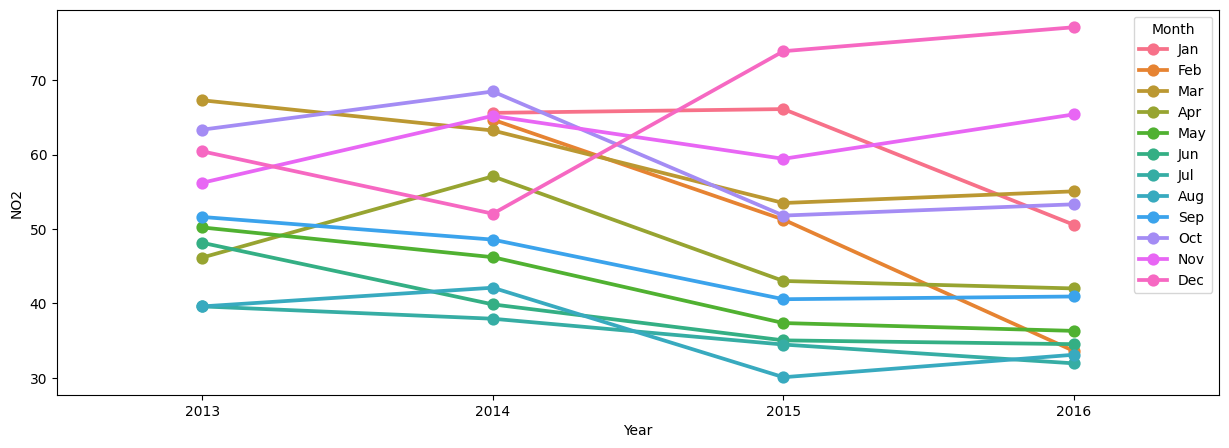

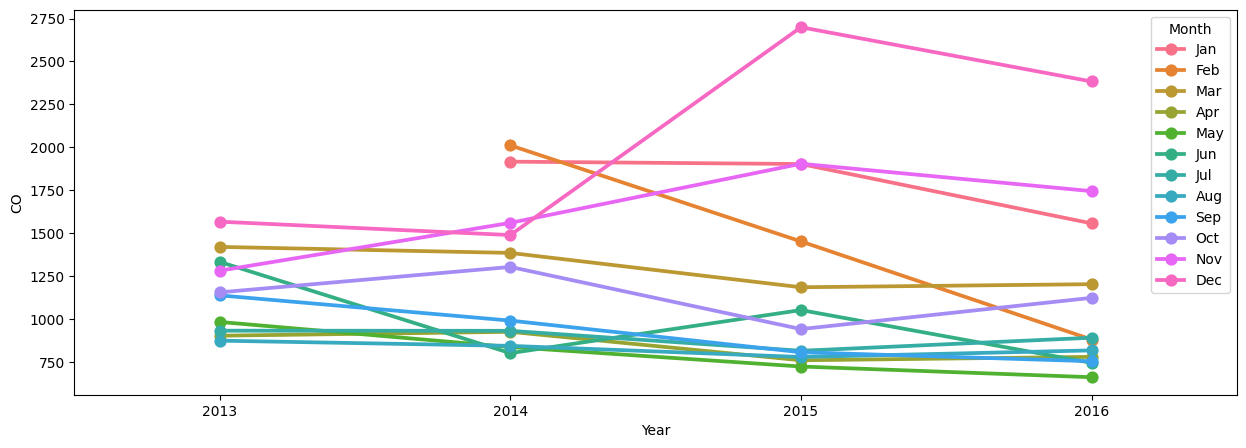

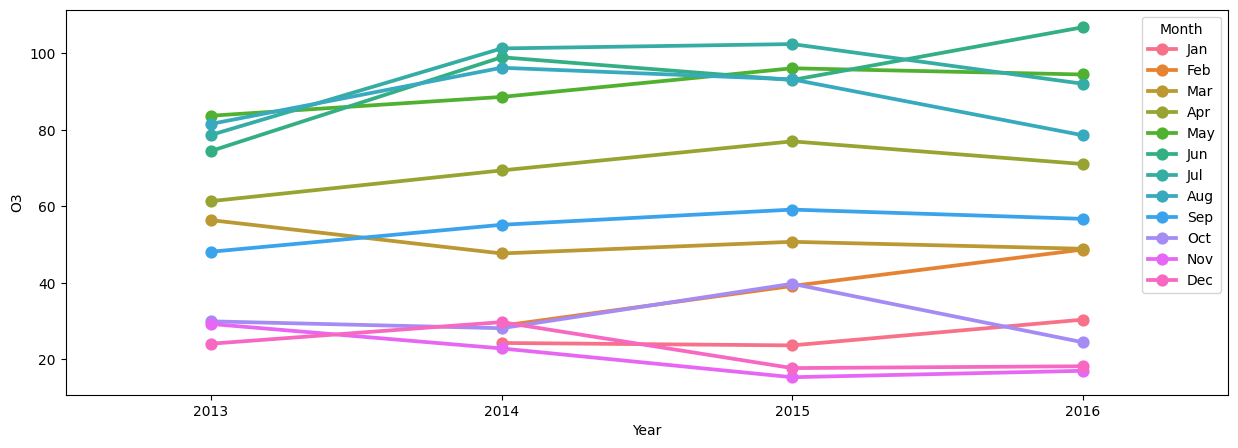

In [31]:
for i in compounds:
    temp_data = data_air_train.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    data_air_train1 = temp_data[[i, 'Month', 'Year',]].groupby(["Year", "Month"]).mean().reset_index().sort_values(by=['Year','Month'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=data_air_train1, hue='Month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

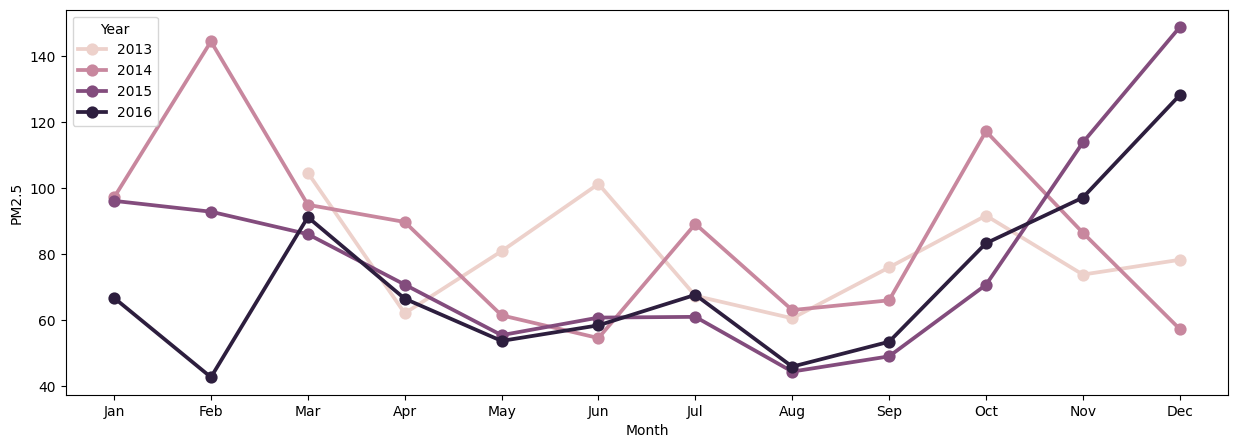

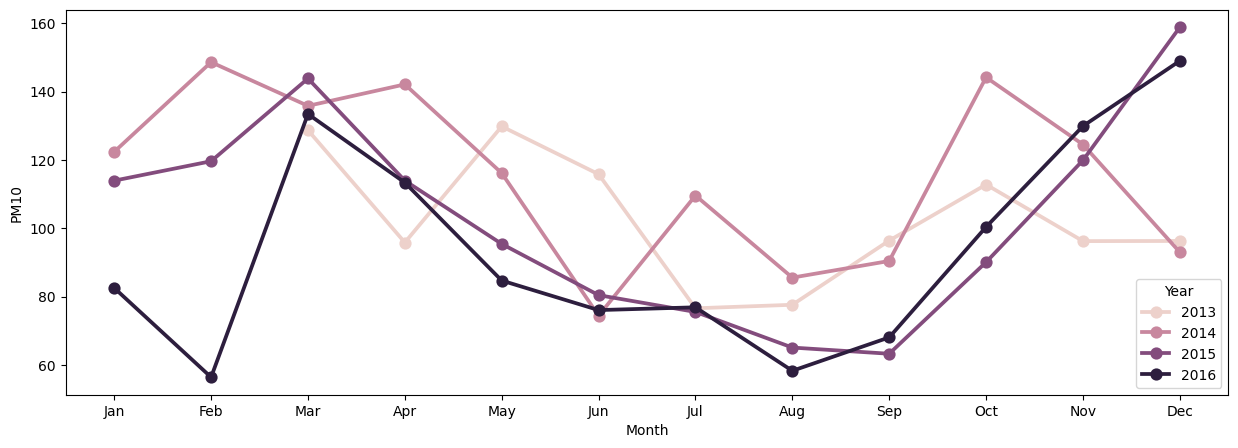

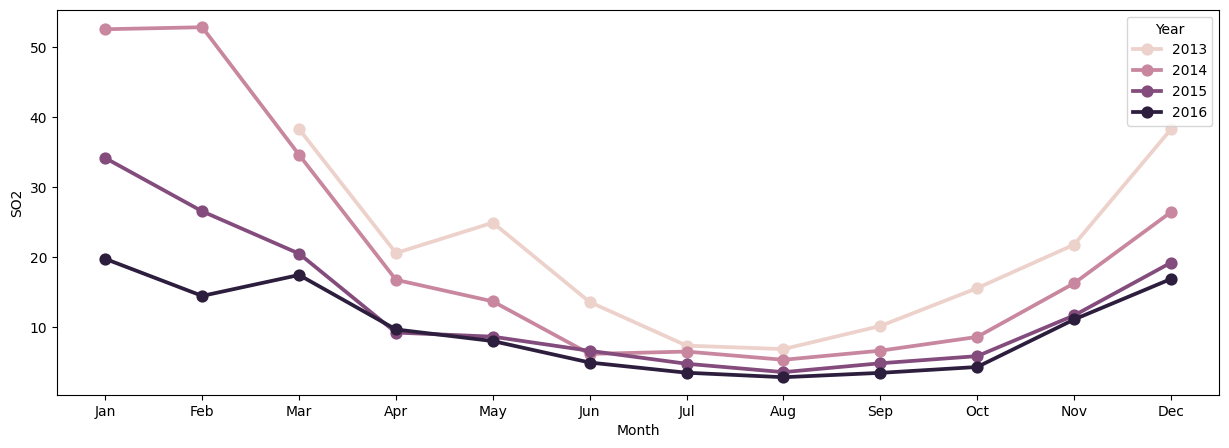

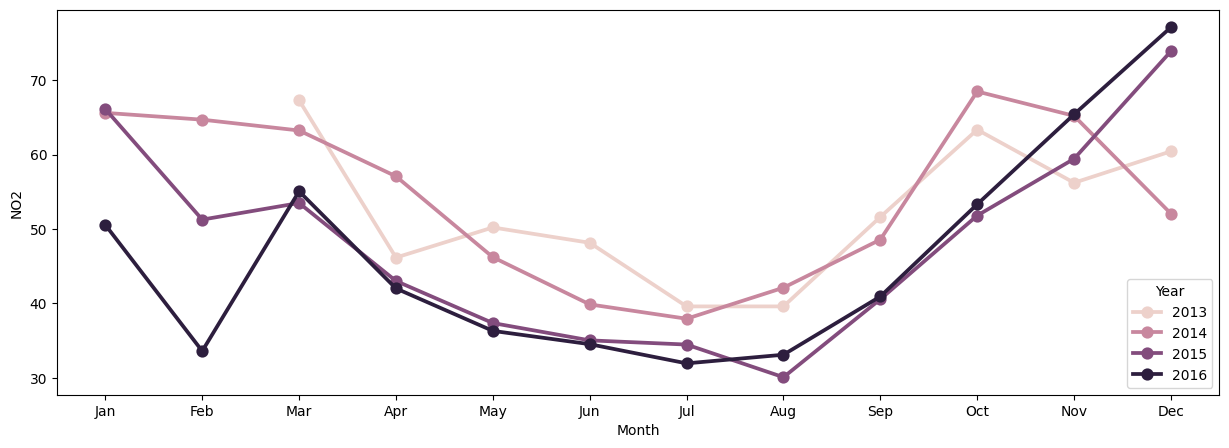

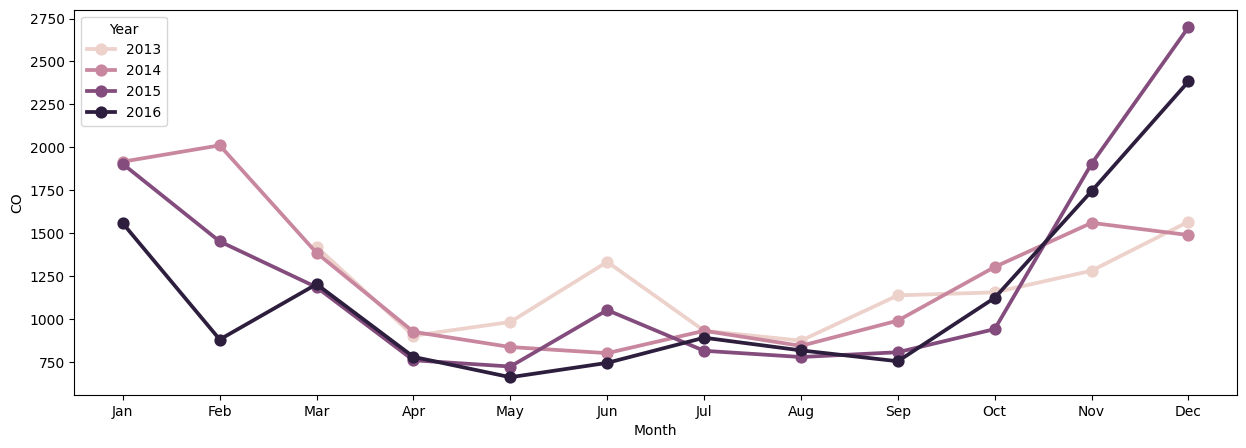

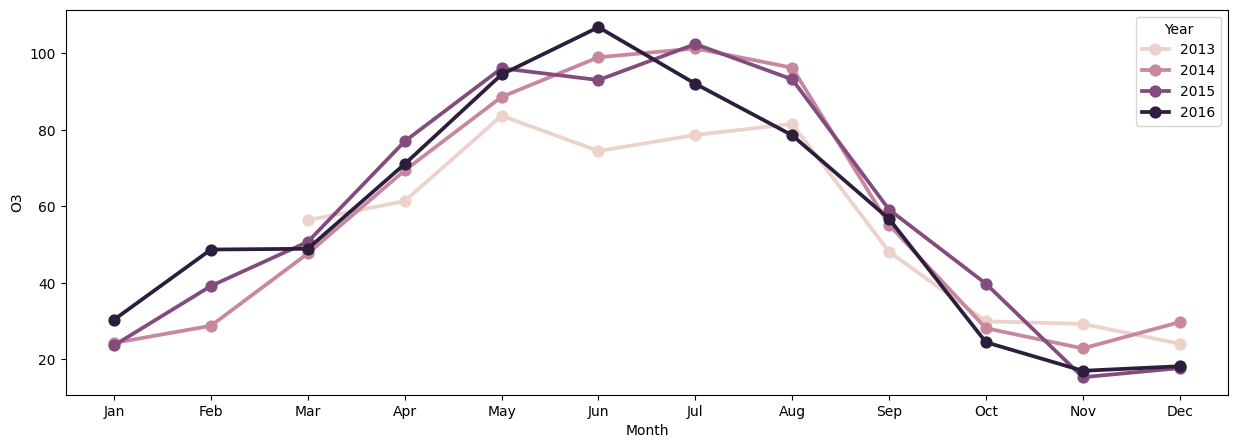

In [32]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}

for i in compounds:
    temp_data = data_air_train.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    data_air_train1 = temp_data[[i, 'Month', 'Year']].groupby(["Year","Month"]).mean().reset_index().sort_values(by=['Year','Month'], ascending=True)
    data_air_train1 = data_air_train1.iloc[data_air_train1['Month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Month', y=i, data=data_air_train1, hue="Year")

Station Based Analysis

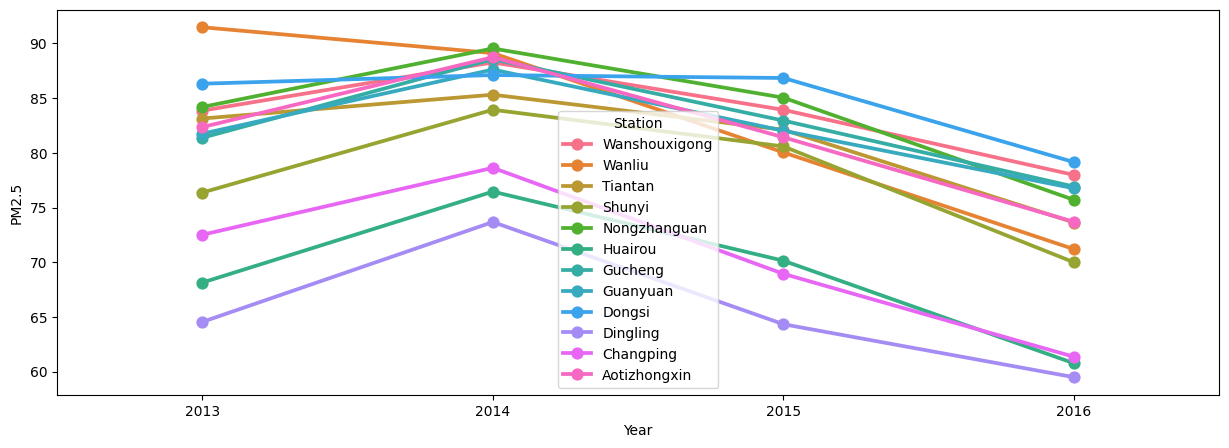

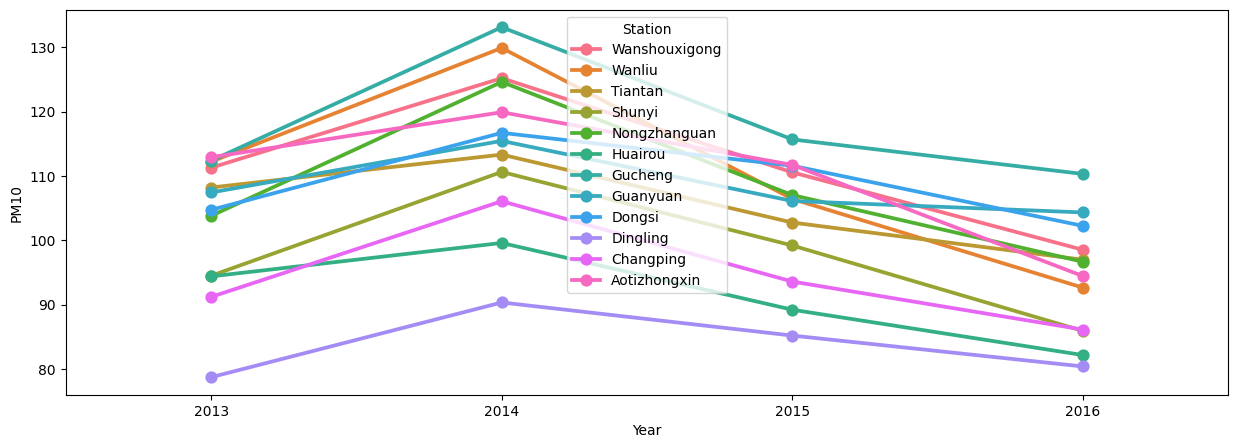

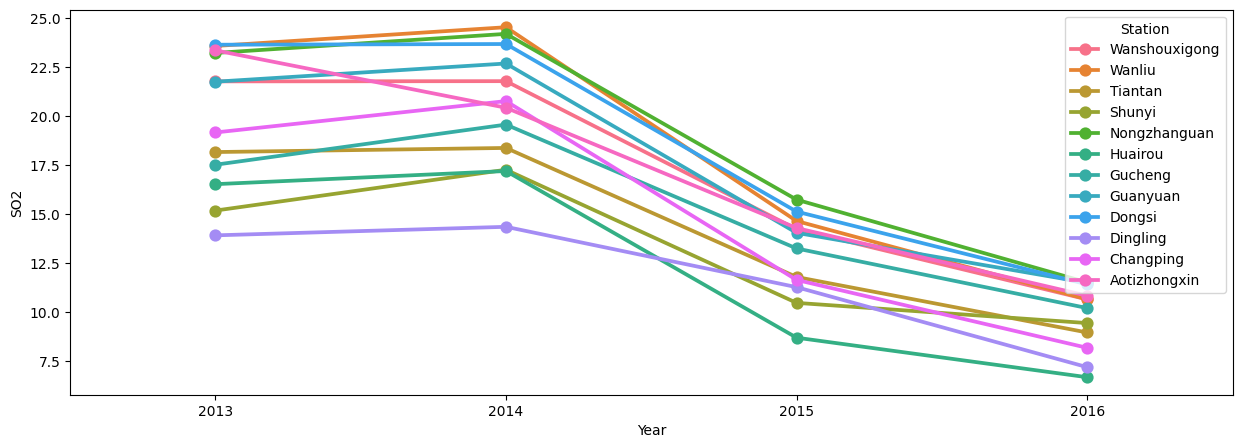

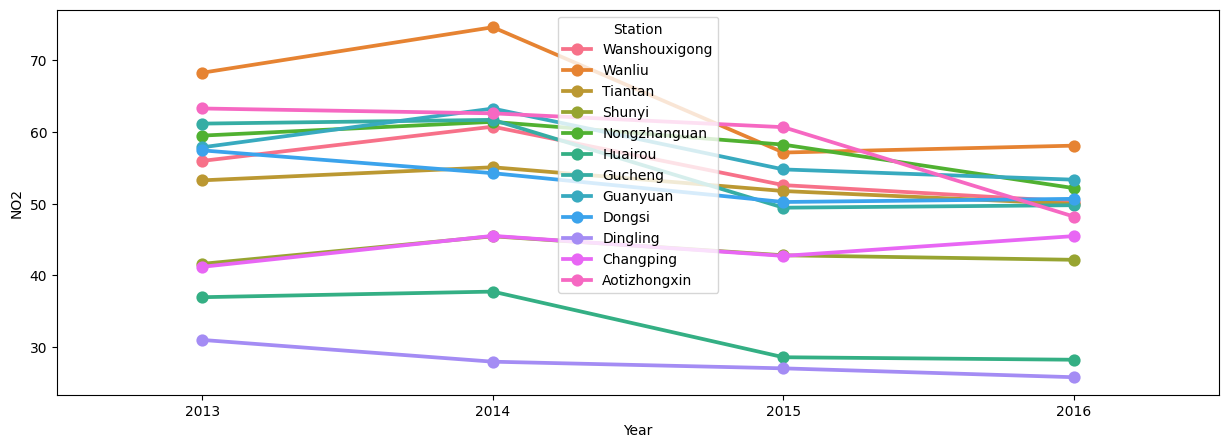

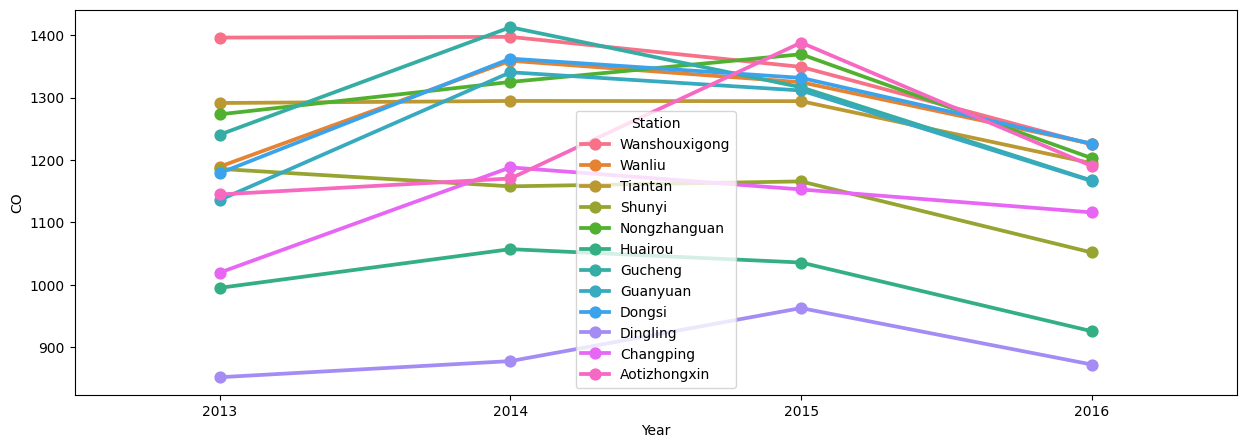

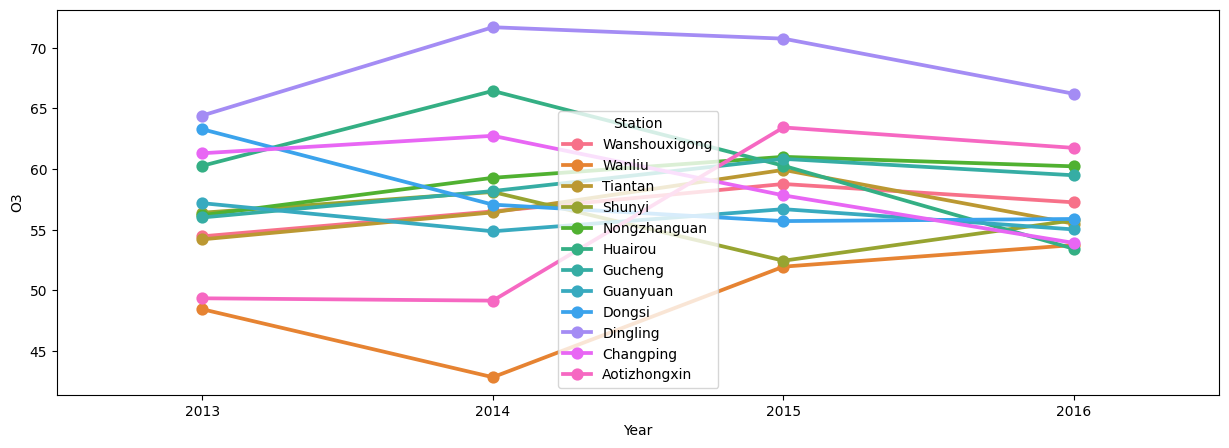

In [33]:
for i in compounds:
    data_air_train1 = data_air_train[[i, 'Year', 'Station']].groupby(["Year","Station"]).mean().reset_index().sort_values(by=['Station','Year'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=data_air_train1, hue="Station")
    plt.show()

In [ ]:
data_air_train.drop(['Year','Month','Day','Hour','PM10','dateInt','Date','date'], axis=1, inplace=True)
data_air_train.info()


Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]):
        print(f'{i}  ->  {j}')
    return labelColumn

In [39]:
categorical_variables = ["WinDir", "Station"]

for i in categorical_variables:
    print(f"For {i} column ")
    data_air_train[f'{i}'] = labelEncoder(data_air_train[f'{i}'])
    print("******************")

For WinDir column 
Encoding Approach:
6  ->  6
3  ->  3
7  ->  7
5  ->  5
1  ->  1
0  ->  0
4  ->  4
13  ->  13
11  ->  11
15  ->  15
9  ->  9
14  ->  14
10  ->  10
2  ->  2
8  ->  8
12  ->  12
******************
For Station column 
Encoding Approach:
0  ->  0
1  ->  1
2  ->  2
3  ->  3
4  ->  4
5  ->  5
6  ->  6
7  ->  7
8  ->  8
9  ->  9
10  ->  10
11  ->  11
******************


In [40]:
data_air_train.head()

,REF_NO,PM2.5,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,1,4.00,4.00,7.00,300.00,77.00,-0.70,1023.00,-18.80,0.00,6,4.40,0
1,2,8.00,4.00,7.00,300.00,77.00,-1.10,1023.20,-18.20,0.00,3,4.70,0
2,3,7.00,5.00,10.00,300.00,73.00,-1.10,1023.50,-18.20,0.00,6,5.60,0
3,4,6.00,11.00,11.00,300.00,72.00,-1.40,1024.50,-19.40,0.00,7,3.10,0
4,5,3.00,12.00,12.00,300.00,72.00,-2.00,1025.20,-19.50,0.00,3,2.00,0


Importing the Libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

Train Test Split

In [42]:
x = data_air_train.drop('PM2.5', axis=1)
y = data_air_train['PM2.5']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=128)

In [44]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (321909, 12)
y_train: (321909,)
x_test: (80478, 12)
y_test: (80478,)


In [45]:
def allRegressors(x_train, x_test, y_train, y_test):
    Regressors = [LinearRegression(),
                  RandomForestRegressor(),
                  GradientBoostingRegressor(),
                  KNeighborsRegressor(),
                  DecisionTreeRegressor()]

    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    r2_dict = {}
    r2_Scores = []

    # function for mean absolute error
    def maeScore(regressor):
        clf = regressor.fit(x_train, y_train)
        pred = clf.predict(x_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score

    # function for root mean square error
    def rmseScore(regressor):
        clf = regressor.fit(x_train, y_train)
        pred = clf.predict(x_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score

    # function for r2 score
    def r2Score(regressor):
        clf = regressor.fit(x_train, y_train)
        pred = clf.predict(x_test)
        r2_Score = r2_score(y_test, pred)
        return r2_Score

    for regressor in Regressors:
        name = regressor.__class__.__name__

        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))

        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))

        r2_dict[name] = r2Score(regressor)
        r2_Scores.append(r2Score(regressor))

        print("************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
        print(f"{name} R2 Score = {r2_dict[name]}")

    # # plotting the performance of regressors
    # def plotPerformance(scores_list, scores_dict, metric:str):
    #     N = len(Regressors)
    #     w = 0.5
    #     x1 = np.arange(N)
    #     plt.bar(x1, scores_list, width = w, align='center', color='c')
    #     plt.xlabel("Regressors")
    #     plt.ylabel(f"{metric} Error")
    #     plt.title("Performance Comparision of Regressors")
    #     plt.xticks(x1, scores_dict.keys(), rotation=90)
    #     plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
    #     plt.show()

    # # call the functions
    # plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    # plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")
    # plotPerformance(r2_Scores, r2_dict, "R2 Score")

In [ ]:
allRegressors(x_train, x_test, y_train, y_test)

************************************************
LinearRegression Mean Absolute Error = 30.03415807205521
LinearRegression Root Mean Square Error = 44.89516601360587
LinearRegression R2 Score = 0.6738181685543804
